## Least-squares fits

A cost function for a general weighted least-squares fit (aka chi-square fit) is also included. In statistics this is called non-linear regression.

In this case you need to provide a model that predicts the y-values as a function of the x-values and the parameters. The fit needs estimates of the y-errors. If those are wrong, the fit may be biased. If your data has errors on the x-values as well, checkout the tutorial about automatic differentiation, which includes an application of that to such fits.

In [1]:
using Revise
using Minuit2
using Plots

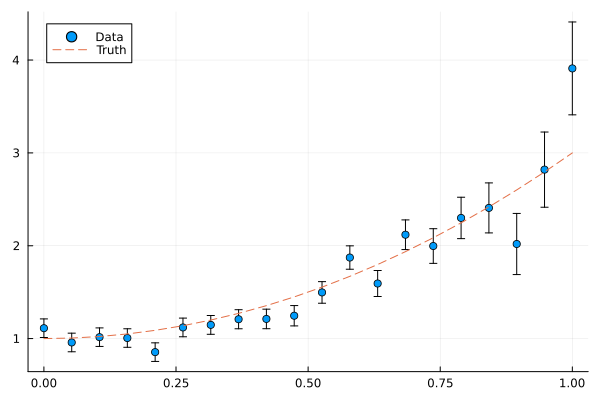

In [2]:
# Define the model
model(x, a, b) = a + b * x^2

# Define the data and truth
truth = 1, 2
x = range(0, 1., 20)
yt = model.(x, truth...)
ye = 0.4 .* x.^5 .+ 0.1
y = yt + ye .* randn(length(x))

# Plot with error bars
plot(x, y, yerr=ye, seriestype=:scatter, label="Data")
plot!(x, yt, label="Truth", linestyle=:dash)

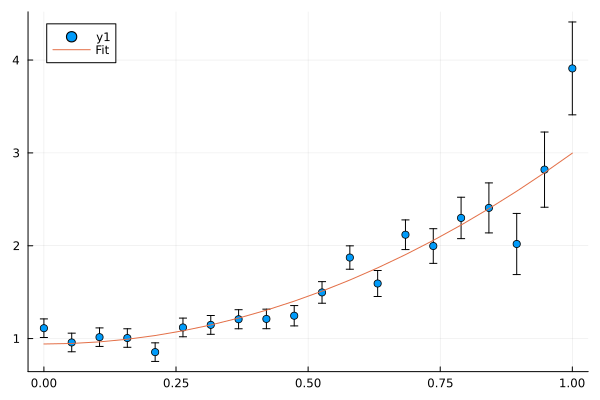

In [32]:
c = LeastSquares(x, y, ye, model)
m1 = Minuit(c, a=0, b=0)
migrad!(m1)
visualize(m1)

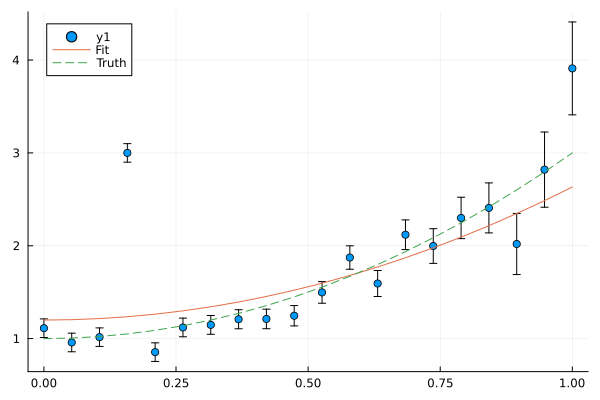

In [35]:
c.y[4] = 3.0   # Generate an outlier
migrad!(m1)
visualize(m1)
plot!(x, yt, label="Truth", linestyle=:dash)

In [36]:
m1.parameters

┌───┬──────┬─────────┬─────────────┬────────┬────────┬────────┬────────┬────────
│   │ Name │ Value   │ Hesse Error │ Minos- │ Minos+ │ Limit- │ Limit+ │ Fixed ⋯
├───┼──────┼─────────┼─────────────┼────────┼────────┼────────┼────────┼────────
│ 1 │ a    │ 1.19951 │ 0.0372301   │        │        │        │        │       ⋯
│ 2 │ b    │ 1.43339 │ 0.150494    │        │        │        │        │       ⋯
└───┴──────┴─────────┴─────────────┴────────┴────────┴────────┴────────┴────────
                                                                1 column omitted


### Multivariate model

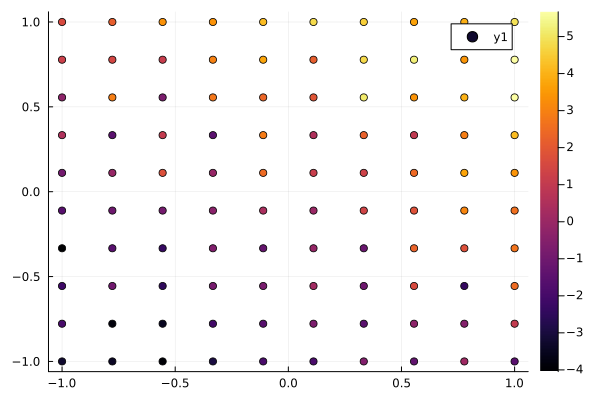

In [ ]:
function model2(xy, a, bx, by)
    x, y = xy
    return a + bx * x + by * y
end

function model2_grad(xy, a, bx, by)
    x, y = xy
    return [1, x, y]
end

# generate a regular grid in x and y
xy = [(x,y) for x in range(-1.,1.,10) for y in range(-1.,1.,10)]

# model truth 
zt = model2.(xy, 1, 2, 3)

zerror = 1.
z = zt .+ zerror .* randn(length(xy))

scatter(xy, zcolor=z)

In [42]:
c2 = LeastSquares(xy, z, zerror, model2)
m2 = Minuit(c2, 0, 0, 0)
migrad!(m2)

┌──────────────┬──────────────┬───────────┬────────────┬─────────────┐
│ FCN          │ Method       │ Ncalls    │ Iterations │ Up          │
│ 95.8287      │              │ 34        │ 3          │ 1.0         │
├──────────────┼──────────────┼───────────┼────────────┼─────────────┤
│ Valid Min.   │ Valid Param. │ Above EDM │ Call limit │ Edm         │
│ true         │ true         │ false     │ false      │ 2.76288e-16 │
├──────────────┼──────────────┼───────────┼────────────┼─────────────┤
│ Hesse failed │ Has cov.     │ Accurate  │ Pos. def.  │ Forced      │
│ false        │ true         │ true      │ true       │ false       │
└──────────────┴──────────────┴───────────┴────────────┴─────────────┘
┌───┬──────┬──────────┬─────────────┬────────┬────────┬────────┬────────┬───────
│   │ Name │ Value    │ Hesse Error │ Minos- │ Minos+ │ Limit- │ Limit+ │ Fixe ⋯
├───┼──────┼──────────┼─────────────┼────────┼────────┼────────┼────────┼───────
│ 1 │ a    │ 0.807714 │ 0.1         │        │ 

Multivariate fits are difficult to check by eye. Here we use color to indicate the function value.

To guarantee that plot of the function and the plot of the data use the same color scale.

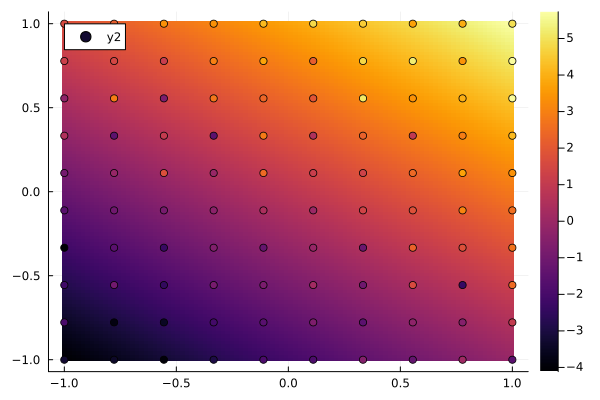

In [53]:
heatmap(range(-1.,1.,100), range(-1.,1.,100), (x,y)->model2((x,y), m2.values...))
scatter!(xy, zcolor=z)

In [21]:
c2.y

100-element view(::Matrix{Float64}, :, 3) with eltype Float64:
 -4.024002156386138
 -3.2451824356760546
 -1.2388164926061587
 -3.421362078006031
 -0.1533423865697625
 -0.32037583982742013
  0.23487588789359432
  0.1851994318837148
  0.6953880760811956
  2.1803895632929144
  ⋮
  1.2502375802454389
  1.4300952584759945
  2.205264713338519
  3.2383838859761847
  4.652997424652476
  2.213484276471419
  2.889864526941868
  7.019411625850654
  5.748219740471652

In [28]:
ym = [c2.model(x[i,:], 1., 2., 3.) for i in length(y)] 

BoundsError: BoundsError: attempt to access 1-element Vector{Float64} at index [2]

In [29]:
model2([1.,1.], 1., 2., 3.)

6.0